In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from collections import Set
from pathlib import Path



warnings.filterwarnings("ignore")

<ipython-input-1-33f5c50b6540>:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Set


**Vorschlag Zielwert ZQ Synergy**

$PE(GFZ)= min( 1,63*(\frac{35.2}{GFZ+0,15}-27.3) ; 100) $     $[kWh_{PE}/m²_{BGF}a]$

In [18]:
# ZQ Austria Vorschlag

GFZ = np.linspace(0.0, 5, 500) #min, max, steps
from utils.targets import target



from utils.plotting import plot_context_factor

Text(0, 0.5, 'PE-Balance $[{kWh/m²_{BGF}a}]$')

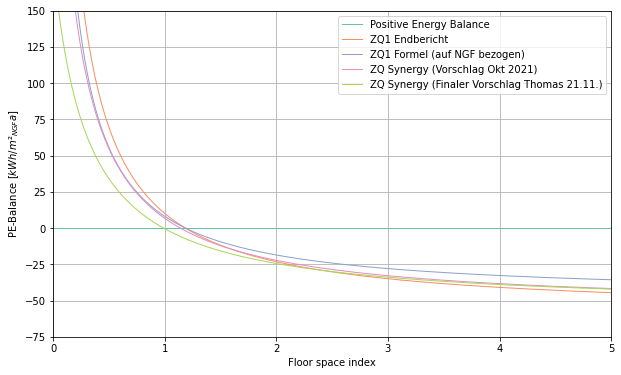

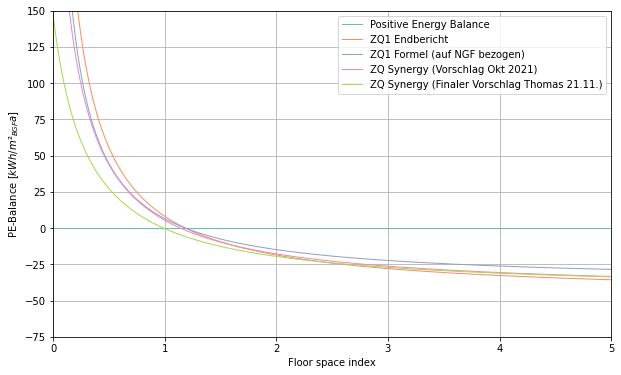

In [48]:
PEQ_alfa = pd.DataFrame({
    "Positive Energy Balance":np.zeros(len(GFZ)),
    "ZQ1 Endbericht":target(GFZ, A=37, dx=0.085,EUI=29.14, cutoff=None),
    "ZQ1 Formel (auf NGF bezogen)":
        target(GFZ, A=37, dx=0.085,EUI=29.14, fPE=1.63*0.8, cutoff=None),
    "ZQ Synergy (Vorschlag Okt 2021)": target(GFZ),
    "ZQ Synergy (Finaler Vorschlag Thomas 21.11.)": target(GFZ, dx=0.3),
    # "ZQ Synergy (Vorschlag Simon I 21.11.)": target(GFZ, dx=0.18, EUI=30),
    # "ZQ Synergy (Vorschlag Simon II 21.11.)": target(GFZ, dx=0.25, A=40, EUI=30),
}, index=GFZ)

PEQ_alfa_NGF = PEQ_alfa / 0.8



fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa_NGF)
ax.set_ylabel("PE-Balance $[{kWh/m²_{NGF}a}]$")



fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa)
ax.set_ylabel("PE-Balance $[{kWh/m²_{BGF}a}]$")


In [43]:
PEQ_alfa_NGF


,Positive Energy Balance,ZQ1 Endbericht,ZQ1 Formel (auf NGF bezogen),ZQ Synergy (Vorschlag Okt 2021),ZQ Synergy (Finaler Vorschlag Thomas 21.11.),ZQ Synergy (Vorschlag Simon 21.11.)
0.00000,0.0,827.539015,662.031212,375.000000,183.442917,337.319444
0.01002,0.0,734.012518,587.210015,375.000000,175.716134,316.308875
0.02004,0.0,658.329482,526.663586,366.159161,168.473182,297.403151
0.03006,0.0,595.828199,476.662559,342.687658,161.669996,280.301064
0.04008,0.0,543.340740,434.672592,321.690747,155.267706,264.756260
...,...,...,...,...,...,...
4.95992,0.0,-44.429500,-35.543600,-41.588305,-41.988561,-47.171475
4.96994,0.0,-44.459121,-35.567296,-41.615773,-42.014487,-47.198624
4.97996,0.0,-44.488624,-35.590899,-41.643134,-42.040314,-47.225667
4.98998,0.0,-44.518012,-35.614409,-41.670388,-42.066043,-47.252606


Specify excel path

In [6]:
path = Path(r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\Plusenergie-Campus Energybase 2.0 (Sdz 9)\4_Quartier\PEExcel_final\PEC Varianten.xlsx")

df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Columns: 380 entries, Name to Umweltenergiepotential Straße/Gehweg [MWh/a]
dtypes: bool(9), float64(285), int64(64), object(22)
memory usage: 2.6+ MB


Identify the required columns

In [7]:
df.columns

Index(['Name', 'Quartier', 'depth', 'Linie', 'Forschungsprojekt', 'Land',
       'Stadt', 'Variante', 'Mikroquartier', 'Generation',
       ...
       'Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa].1',
       'PE-Saldo Ziel NGF [kWh/m²NGFa].1',
       'PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa].1',
       'PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1',
       'PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa].1',
       'Heizenergie [MWh/a]', 'Kühlenergie [MWh/a]',
       'Umweltenergiepotential Freifläche [MWh/a]',
       'Umweltenergiepotential Innenhof [MWh/a]',
       'Umweltenergiepotential Straße/Gehweg [MWh/a]'],
      dtype='object', length=380)

In [8]:
available = set(df.columns)

PEB_varname = "Primärenergiesaldo ohne Dichteausgleich"
PEB_Zielwert = "PE-Saldo Ziel BGF real (NGF/BGF=0,85)"
GFZ = "GFZ"
required = {
    "Name",

    "Mikroquartier",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima",

    GFZ,
    PEB_varname,
    PEB_Zielwert,
    'Heizenergie [MWh/a]',
    'Kühlenergie [MWh/a]',
    'Umweltenergiepotential auf Grundstück [MWh/a]',

}

print("missing columns:\n", required - available)

missing columns:
 {'Primärenergiesaldo ohne Dichteausgleich', 'GFZ', 'Umweltenergiepotential auf Grundstück [MWh/a]', 'PE-Saldo Ziel BGF real (NGF/BGF=0,85)'}


In [9]:
for c in df.columns:
    if "PE" in c:
        print(c)

PEBedarf [kWh/m²NGFa]
CO2,PE Profil
PEBedarf [kWh/m²NGFa].1
PEExport [kWh/m²NGFa]
PESaldo [kWh/m²NGFa]
PEBedarf [kWh/m²NGFa].2
PEExport [kWh/m²NGFa].1
PESaldo [kWh/m²NGFa].1
PEBedarf [kWh/m²NGFa].3
PEExport [kWh/m²NGFa].2
PESaldo [kWh/m²NGFa].2
PE-Saldo Ziel NGF [kWh/m²NGFa]
PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa]
PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa]
PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa]
PEBedarf [kWh/m²NGFa].4
PEExport [kWh/m²NGFa].3
PESaldo [kWh/m²NGFa].3
PE-Saldo Ziel NGF [kWh/m²NGFa].1
PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa].1
PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1
PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa].1


ValueError: Could not interpret value `GFZ` for parameter `x`

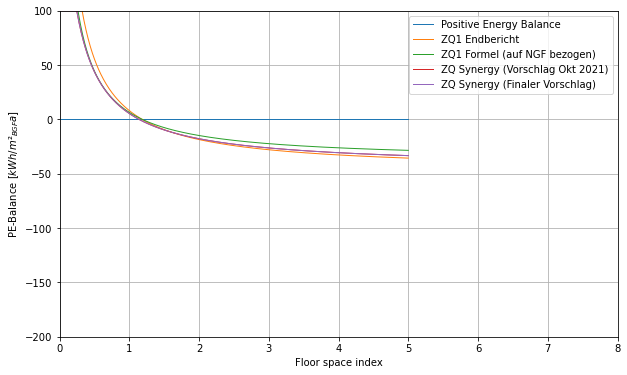

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa, ylims=(-200,100))
sns.set_palette("Set2") #"Reds"
sns.scatterplot(ax=ax,
                x=GFZ,
                y=PEB_varname,
                hue="Mikroquartier",
                data=df)

In [ ]:
subplot_columns = [
    "Mikroquartier",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima"]

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    plot_context_factor(ax,
                        df=PEQ_alfa,
                        ylims=(-200,100),
                        xlims=(1.5,3),
                        no_legend=True
                        )
    sns.scatterplot(ax=ax,
                    x=GFZ,
                    y=PEB_varname,
                    hue=category,
                    data=df)
plt.tight_layout()

In [ ]:
dfmin = df[required]
dfmin.columns


In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    sns.boxplot(ax=ax, data=dfmin,
                x=PEB_varname, y="Mikroquartier",
                whis=[0, 100], width=.8, linewidth=0.6
                )

    sns.stripplot(ax=ax, x=PEB_varname, y="Mikroquartier",
              data=dfmin, hue=category, color="orange",
              size=4, linewidth=0)

    sns.stripplot(ax=ax, x=PEB_Zielwert, y="Mikroquartier",
              data=dfmin, color="red",
              size=5, linewidth=0)
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(20,15), sharex=True, sharey=True)
for ax, mqs in zip(axes.flatten(), dfmin.Mikroquartier.unique()):
    ax.plot(np.arange(len(dfmin[dfmin.Mikroquartier==mqs])), PEB_varname,
    data=dfmin[dfmin.Mikroquartier==mqs], linestyle='-', marker='o')


In [ ]:
b1 = dfmin[dfmin.Mikroquartier=="Blockrand 1"]
mq_count = 2 #dfmin.Mikroquartier.unique()
cat_count = len(subplot_columns[:3])

fig, axes = plt.subplots(mq_count,cat_count, figsize=(20,15))
for axcol, cat in enumerate(subplot_columns[:3]):
    sns.catplot(ax=axes[0, axcol],
                x=cat,
                y=PEB_varname,
                order=b1[cat].unique(),
                data=b1)

In [ ]:
test